In [1]:
import sys

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

sys.path.append('../aster-loader/')
from image import AsterImage

### Load image object

In [2]:
aster = AsterImage('../../data/hiperespectral/pg-PR1B0000-2001022302_022_001.h5')

We can now check available bands and their corresponding index in the HDF file

In [3]:
aster.bands

{'SWIR': ['4', '5', '6', '7', '8', '9'],
 'TIR': ['10', '11', '12', '13', '14'],
 'VNIR': ['1', '2', '3N', '3B']}

We can also see the type of information we can query

In [4]:
aster.band_nodes

{'SWIR': {'geo_data': '/SWIR/SWIR_Swath/Geolocation Fields',
  'img_data': '/SWIR/SWIR_Swath/Data Fields',
  'root': '/SWIR',
  'supplement': '/SWIR/SWIR_Supplement'},
 'TIR': {'geo_data': '/TIR/TIR_Swath/Geolocation Fields',
  'img_data': '/TIR/TIR_Swath/Data Fields',
  'root': '/TIR',
  'supplement': '/TIR/TIR_Supplement'},
 'VNIR': {'geo_data': '/VNIR/VNIR_Swath/Geolocation Fields',
  'img_data': '/VNIR/VNIR_Swath/Data Fields',
  'root': '/VNIR',
  'supplement': '/VNIR/VNIR_Supplement'}}

### HDF information
For low level users, we can query direct HDF info such as node locations for each type of data

In [5]:
print(aster.band_nodes['SWIR']['img_data'])
print(aster.band_nodes['SWIR']['geo_data'])
print(aster.band_nodes['SWIR']['supplement'])

/SWIR/SWIR_Swath/Data Fields
/SWIR/SWIR_Swath/Geolocation Fields
/SWIR/SWIR_Supplement


### Display image data

Given the data keys, we can query a specific band-range for a specific image using `aster.bands` indexes

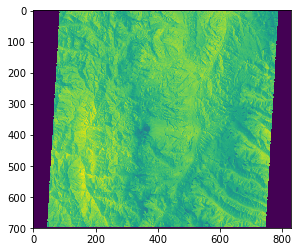

In [6]:
im9 = aster.load_image('TIR', 14)
plt.imshow(im9)

### Load supplement data

We can also load supplement data, which can be a single array or a dict of arrays

In [7]:
vnir_supplement = aster.load_supplement('VNIR')
swir_supplement = aster.load_supplement('SWIR')
tir_supplement  = aster.load_supplement('TIR')

Returning array of supplement.
Returning array of supplement.
Returning dict of supplements.


### Load cube for a band range

We can query the cube for each of the band ranges using `load_band_cube` (2D) or `load_flat_cube` (1D)

In [8]:
cube = aster.load_band_cube('TIR')
flattened_cube = aster.load_flat_cube('TIR')

print(cube.shape, flattened_cube.shape)

(700, 830, 5) (581000, 5)


### Full cube
Since all band-ranges are on a different scale, one could process all as a single cube. This is possible because all band-ranges are linearly scaled images

In [9]:
swir_cube = aster.load_band_cube('SWIR')
vnir_cube = aster.load_band_cube('VNIR')
tir_cube  = aster.load_band_cube('TIR')

print(tir_cube.shape, swir_cube.shape, vnir_cube.shape)

(700, 830, 5) (2100, 2490, 6) (4200, 4980, 3)


As you can see, SWIR and VNIR sizes are just TIR size multiplied by 3 and 6. We use the function `load_full_cube` to fit that common ground

In [10]:
full_cube = aster.load_full_cube()
print(full_cube.shape)

(700, 830, 14)


**Be careful with this method** since hyperspectral images for each band-rage are taken with different sensors, i.e., different spatial separation between each pixel, so this common ground may or may not correspond to spatial locations between each measure.